In [1]:
import nibabel as nib
import pyvista as pv
import numpy as np
from pathlib import Path
import pandas as pd

### Analize annotated data from verse

In [706]:
labeled_verse = pd.read_csv('/home/binigo1/spine_project/extract_vert_feat/results/labeled_verse.csv')

<Axes: >

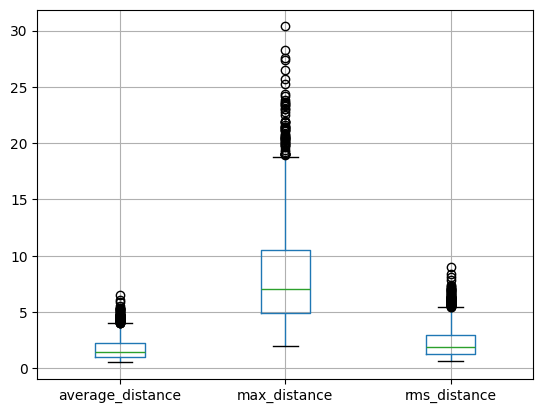

In [707]:
results = pd.read_csv('/home/binigo1/spine_project/extract_vert_feat/results/verse19_features.csv')
# display the boxplot
results.boxplot()

In [708]:
# merge the labeled_verse with results
results = pd.merge(results, labeled_verse, on='mesh_path', how='left')
results

,mesh_path,average_distance,max_distance,rms_distance,correct
0,/data2/blanca/verse19/verse225/meshes/body_ver...,1.514589,6.202919,1.957213,y
1,/data2/blanca/verse19/verse225/meshes/body_ver...,1.235342,5.526703,1.533455,y
2,/data2/blanca/verse19/verse225/meshes/body_ver...,1.228685,5.210455,1.519242,n
3,/data2/blanca/verse19/verse225/meshes/body_ver...,0.921885,3.375193,1.084029,n
4,/data2/blanca/verse19/verse225/meshes/body_ver...,2.109412,8.686570,2.818639,y
...,...,...,...,...,...
1641,/data2/blanca/verse19/verse093/meshes/body_ver...,0.959194,5.905473,1.185342,n
1642,/data2/blanca/verse19/verse093/meshes/body_ver...,0.844413,5.230757,1.083178,n
1643,/data2/blanca/verse19/verse093/meshes/body_ver...,1.199902,5.129526,1.465414,n
1644,/data2/blanca/verse19/verse093/meshes/body_ver...,1.219800,6.268613,1.570845,y


In [709]:
heights_data_verse = pd.read_csv('/home/binigo1/spine_project/preprocess_data/height_map_dataframes/height_maps/verse19_heights_data.csv')
results = pd.merge(results, heights_data_verse, on='mesh_path', how='left')

### Get relative measurements

In [710]:
# check rows with nan values
# results.drop(columns=['lateral_angle_y'], inplace=True)
results.dropna(inplace=True)

In [711]:
results['posterior_angle_x'] = results['posterior_angle_x'].apply(lambda x: x if x < 90 else x-90)
results['posterior_angle_y'] = results['posterior_angle_y'].apply(lambda x: x if x < 90 else x-90)
results['inferior_angle_x'] = results['inferior_angle_x'].apply(lambda x: x if x < 90 else x-90)
results['inferior_angle_y'] = results['inferior_angle_y'].apply(lambda x: x if x < 90 else x-90)
results['lateral_angle_x'] = results['lateral_angle_x'].apply(lambda x: x if x < 90 else x-90)
results['lateral_angle_y'] = results['lateral_angle_y'].apply(lambda x: x if x < 90 else x-90)
# if the angles are bigger than 45, subtract 90 and take the absolute value
results['posterior_angle_x'] = results['posterior_angle_x'].apply(lambda x: 90-x if x > 45 else x)  
results['posterior_angle_y'] = results['posterior_angle_y'].apply(lambda x: 90-x if x > 45 else x)
results['inferior_angle_x'] = results['inferior_angle_x'].apply(lambda x: 90-x if x > 45 else x)
results['inferior_angle_y'] = results['inferior_angle_y'].apply(lambda x: 90-x if x > 45 else x)
results['lateral_angle_x'] = results['lateral_angle_x'].apply(lambda x: 90-x if x > 45 else x)
results['lateral_angle_y'] = results['lateral_angle_y'].apply(lambda x: 90-x if x > 45 else x)

results['vertebrae'] = results['mesh_path'].apply(lambda x: x.split('_')[-1].split('.')[0])
vert_dict = {1:'C1', 2:'C2', 3:'C3', 4:'C4', 5:'C5', 6:'C6', 7:'C7', 8:'T1', 9:'T2', 10:'T3', 11:'T4', 12:'T5', 13:'T6', 14:'T7', 15:'T8', 16:'T9', 17:'T10', 18:'T11', 19:'T12', 20:'L1', 21:'L2', 22:'L3', 23:'L4', 24:'L5', 25:'S1'}
inverse_vert_dict = {v: k for k, v in vert_dict.items()}
results['vertebrae_#'] = results['vertebrae'].apply(lambda x: inverse_vert_dict[x])
results['case'] = results['mesh_path'].apply(lambda x: x.split('/')[-3])
results.vertebrae.value_counts()   

vertebrae
L1     122
L2     121
L4     118
L3     118
L5     114
T12    101
T11     92
T10     86
T9      75
T8      64
T2      63
T5      61
T7      60
T4      60
T3      59
T6      59
T1      58
C7      45
C6      33
C5      29
C4      27
C3      27
C2      26
S1       5
C1       1
Name: count, dtype: int64

In [712]:
import warnings
warnings.filterwarnings('ignore')

for i, row in results.iterrows():
        
    rel_cent_ant = row['s0_avg'] / row['ant_avg']
    rel_cent_post = row['s0_avg'] / row['post_avg']
    rel_ant_post = row['ant_avg'] / row['post_avg']

    results.loc[i, 'rel_cent_ant'] = rel_cent_ant
    results.loc[i, 'rel_cent_post'] = rel_cent_post
    results.loc[i, 'rel_ant_post'] = rel_ant_post

    rel_s0_l_r = row['s0_l_avg'] / row['s0_r_avg']
    rel_s0_a_p = row['s0_a_avg'] / row['s0_p_avg']
    rel_s0_p_ant = row['s0_p_avg'] / row['ant_avg']
    rel_s0_a_post = row['s0_a_avg'] / row['post_avg']

    results.loc[i, 'rel_s0_l_r'] = rel_s0_l_r
    results.loc[i, 'rel_s0_a_p'] = rel_s0_a_p
    results.loc[i, 'rel_s0_p_ant'] = rel_s0_p_ant
    results.loc[i, 'rel_s0_a_post'] = rel_s0_a_post


In [713]:
results.to_csv('/home/binigo1/spine_project/extract_vert_feat/results/all_feat_verse19.csv', index=False)

## RULEFIT

In [ ]:
'''
verse_labeled = pd.read_csv('/home/binigo1/spine_project/extract_vert_feat/results/labeled_verse.csv')
liver_labeled = pd.read_csv('/home/binigo1/spine_project/extract_vert_feat/results/all_feat_Liver_labeled.csv')
colon_labeled = pd.read_csv('/home/binigo1/spine_project/extract_vert_feat/results/all_feat_colon_labeled.csv')
all_feat_verse19 = pd.read_csv('/home/binigo1/spine_project/extract_vert_feat/results/all_feat_verse19.csv')


all_feat_verse19.drop(columns=['vertebrae',
       'vertebrae_#', 'case', 'rel_cent_ant', 'rel_cent_post', 'rel_ant_post',
       'rel_s0_l_r', 'rel_s0_a_p', 'rel_s0_p_ant', 'rel_s0_a_post', 'rat_x_y',
       'rat_y_z', 'rat_x_z'], inplace=True)

# merge the labeled dataframes
labeled = pd.concat([all_feat_verse19, liver_labeled, colon_labeled], ignore_index=True)
# remove the rows with nan values
labeled.dropna(inplace=True)
# remove duplicates based on the mesh_path
labeled.drop_duplicates(subset='mesh_path', inplace=True)

# labeled.to_csv('/home/binigo1/spine_project/extract_vert_feat/results/labeled_data.csv', index=False)
'''

In [4]:
all_feat_colon = pd.read_csv('/home/binigo1/spine_project/extract_vert_feat/results/all_feat_colon.csv')
all_feat_liver = pd.read_csv('/home/binigo1/spine_project/extract_vert_feat/results/all_feat_Liver.csv')
all_feat_COVID = pd.read_csv('/home/binigo1/spine_project/extract_vert_feat/results/all_feat_COVID-19.csv')
all_feat_neck = pd.read_csv('/home/binigo1/spine_project/extract_vert_feat/results/all_feat_HNSCC-3DCT-RT_neck.csv')
all_feat_NMDID_hr = pd.read_csv('/home/binigo1/spine_project/extract_vert_feat/results/all_feat_NMDID_hr.csv')

all_feat_data = pd.concat([all_feat_colon, all_feat_liver, all_feat_COVID, all_feat_neck, all_feat_NMDID_hr], ignore_index=True)

labeled_data = pd.read_csv('/home/binigo1/spine_project/extract_vert_feat/results/labeled_data_new.csv')

print(len(all_feat_data), len(labeled_data))
# remove the labeled data from the all_feat_data by the mesh_path
all_feat_data = all_feat_data[~all_feat_data['mesh_path'].isin(labeled_data['mesh_path'])]
print(len(all_feat_data))
# all_feat_data.to_csv('/home/binigo1/spine_project/extract_vert_feat/results/inference_data.csv', index=False)

9855 2996
8462


In [825]:
results = pd.read_csv('/home/binigo1/spine_project/extract_vert_feat/results/NMDID_hr_features.csv')
height_maps = pd.read_csv('/home/binigo1/spine_project/preprocess_data/height_map_dataframes/height_maps/NMDID_hr_heights_data.csv')
results = pd.merge(results, height_maps, on='mesh_path', how='left')
results.to_csv('/home/binigo1/spine_project/extract_vert_feat/results/all_feat_NMDID_hr.csv', index=False)

In [812]:
results = pd.read_csv('/home/binigo1/spine_project/extract_vert_feat/results/all_feat_verse19.csv')
# map the values of correct as 'y' to 1 and 'n' to 0
results['correct'] = results['correct'].map({'y': 1, 'n': 0})

results["rat_x_y"] = results["res_x"]/results["res_y"]
results["rat_y_z"] = results["res_y"]/results["res_z"]
results["rat_x_z"] = results["res_x"]/results["res_z"]

results["avg_distance_norm"] = results["average_distance"]/results["max_distance"]

In [745]:
# remove duplicates
results.drop_duplicates(subset=['mesh_path'], inplace=True)

In [746]:
# check if there is any row where the correct is nan
results[results['correct'].isna()]

,mesh_path,average_distance,max_distance,rms_distance,correct,s0_avg,s1_avg,s3_avg,s4_avg,s6_avg,...,rel_cent_post,rel_ant_post,rel_s0_l_r,rel_s0_a_p,rel_s0_p_ant,rel_s0_a_post,rat_x_y,rat_y_z,rat_x_z,avg_distance_norm
198,/data2/blanca/verse19/verse151/meshes/body_ver...,2.876320,11.987244,3.944335,NaN,0.924096,0.846488,0.787982,0.921123,0.884575,...,1.024011,0.904007,1.007762,0.954441,1.155944,0.997372,1.086253,1.462430,1.588570,0.239948
240,/data2/blanca/verse19/verse127/meshes/body_ver...,3.058737,10.388809,3.860344,NaN,0.849239,0.829374,0.887891,0.871446,0.892626,...,0.962741,0.973987,0.980481,0.988412,0.993745,0.956678,1.382617,1.205222,1.666361,0.294426
665,/data2/blanca/verse19/verse264/meshes/body_ver...,0.951215,4.326988,1.156795,NaN,0.945627,0.858609,0.919084,0.878222,0.939112,...,1.039491,0.978270,0.982811,0.982971,1.070666,1.029563,1.082615,1.212496,1.312667,0.219833
1374,/data2/blanca/verse19/verse146/meshes/body_ver...,1.841114,7.124650,2.279574,NaN,0.848561,0.858730,0.944093,0.845277,0.885261,...,0.980134,1.042088,1.005652,1.008747,0.936796,0.984763,1.442042,1.077181,1.553340,0.258415


In [748]:
# check if there are any nan values
results.dropna(inplace=True)

In [785]:
# per vertebra and keep only the columns that are needed
results['vertebrae'] = results['mesh_path'].apply(lambda x: x.split('/')[-1].split('_')[-1].split('.')[0])

# results.drop(['W', 'res_x', 'res_y', 'res_z'], axis=1, inplace=True)

results_T1_T4 = results[results['vertebrae'].isin(['T1', 'T2', 'T3', 'T4'])]
results_T5_T8 = results[results['vertebrae'].isin(['T5', 'T6', 'T7', 'T8'])]
results_T9_T12 = results[results['vertebrae'].isin(['T9', 'T10', 'T11', 'T12'])]
results_L1_L5 = results[results['vertebrae'].isin(['L1', 'L2', 'L3', 'L4', 'L5'])]
results_C1_C3 = results[results['vertebrae'].isin(['C1', 'C2', 'C3'])]
results_C4_C7 = results[results['vertebrae'].isin(['C4', 'C5', 'C6', 'C7'])]
results_C = results[results['vertebrae'].isin(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'])]

In [805]:
# split the data into train and test
from sklearn.model_selection import train_test_split
results_T9_T12.drop(["vertebrae", "vertebrae_#", "case"], axis=1, inplace=True)
train, test = train_test_split(results_T9_T12, test_size=0.3, random_state=42)

train_feat = train.drop(columns=['mesh_path'])
test_feat = test.drop(columns=['mesh_path'])

In [806]:
import sys

sys.path.append('/home/binigo1/spine_project/rulefit')

from rulefit.rulefit import RuleFit

X = train_feat.drop('correct', axis=1)
y = train_feat['correct'].values
y = y.astype(int)
features = X.columns
# make X into a numpy array
X = np.array(X)
# get the min and the max for each column
# min = X.min(axis=0)
# max = X.max(axis=0)
# standardize X
# X = (X - min) / (max - min)

from sklearn.ensemble import GradientBoostingClassifier

gc = GradientBoostingClassifier(n_estimators=5000, max_depth=100, learning_rate=0.01, random_state=1)
rf = RuleFit(tree_generator=gc, rfmode="classify", max_rules=10, random_state=0, model_type='lr')
rf.fit(X, y, feature_names=features)

RuleFit(max_rules=10, model_type='lr', random_state=0, rfmode='classify',
        tree_generator=GradientBoostingClassifier(learning_rate=0.01,
                                                  max_depth=100,
                                                  max_leaf_nodes=3,
                                                  n_estimators=3,
                                                  random_state=2))

In [807]:
X = test_feat.drop('correct', axis=1)
y = test_feat['correct'].values
X = np.array(X)

In [808]:
model = rf.predict(X)[0]
new_features = rf.predict(X)[1]
prob = rf.predict_proba(X)
model.predict(new_features)

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [809]:
np.unique(prob[:, 1])

array([0.03664207, 0.03708603, 0.04295624, 0.05546035, 0.06980225,
       0.0698309 , 0.07900373, 0.08894386, 0.09380507, 0.09773391,
       0.09824846, 0.10271212, 0.12606436, 0.13740234, 0.14025383,
       0.14194469, 0.1548966 , 0.17644711, 0.2142534 , 0.31702429,
       0.38019603, 0.46563559, 0.53002589, 0.54156186, 0.55954491,
       0.56722696, 0.57034257, 0.58200472, 0.58707402, 0.59028107,
       0.59043552, 0.59515537, 0.5994338 , 0.60065225, 0.61388705,
       0.62291744, 0.64980031, 0.65007487, 0.65014968, 0.66218734,
       0.66916116, 0.7159397 , 0.82469187, 0.86450289, 0.86566057,
       0.87081513, 0.87261486, 0.87458372, 0.87544692, 0.8824867 ,
       0.88495911, 0.8903769 , 0.89114636, 0.89527079, 0.89792927,
       0.90408462, 0.90502275, 0.90541102, 0.90635105, 0.90814839,
       0.9115695 , 0.91413404, 0.91584558, 0.91639955, 0.91812624,
       0.91826863, 0.9228081 , 0.92285339, 0.9229584 , 0.92332514,
       0.9241741 , 0.9252466 , 0.92529431, 0.92641911, 0.92643

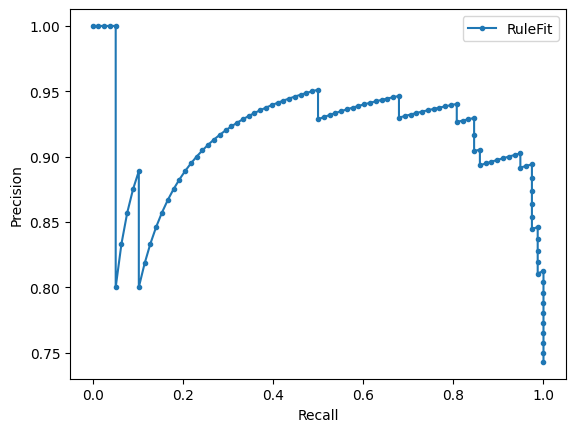

In [810]:
# Precision recall curve given the probabilities
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y, prob[:, 1])
plt.plot(recall, precision, marker='.', label='RuleFit')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [811]:
df = test
# test["predicted"] = model.predict(new_features)
df["predicted"] = prob[:, 1] > 0.8

# get accuracy, f1 score, precision, recall and the confusion matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

accuracy = accuracy_score(df['correct'], df['predicted'])
f1 = f1_score(df['correct'], df['predicted'])
precision = precision_score(df['correct'], df['predicted'])
recall = recall_score(df['correct'], df['predicted'])
conf_matrix = confusion_matrix(df['correct'], df['predicted'])

accuracy, f1, precision, recall, conf_matrix

(0.780952380952381,
 0.8368794326241135,
 0.9365079365079365,
 0.7564102564102564,
 array([[23,  4],
        [19, 59]]))

In [803]:
rf.rule_ensemble.rules, model.coef_, model.intercept_

([ant_avg <= 0.7782506048679352,
  ant_avg > 0.7782506048679352 & res_y <= 44.78866386413574,
  ant_avg > 0.7782506048679352 & res_y > 44.78866386413574,
  ant_avg > 0.7782506048679352 & res_y <= 44.78866386413574 & res_x <= 55.15445518493652,
  ant_avg > 0.7782506048679352 & res_y <= 44.78866386413574 & res_x > 55.15445518493652],
 array([[ 0.        , -0.64258909,  0.        ,  0.        ,  0.        ,
          0.310774  ,  0.        ,  0.        ,  0.15702583,  0.        ,
          0.13322523,  0.        ,  0.30884903,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.37859845,  0.        ,  0.        ,  0.        , -0.81246792,
         -0.92627944,  0.        ,  0.        ,  0.        ,  0.        ,
          0.0969769 ,  0.06197413,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.21227862,  0.        ,  1.28780143,
          0.        ,  0.53307947,  0.        ]]),
 array([0.]))

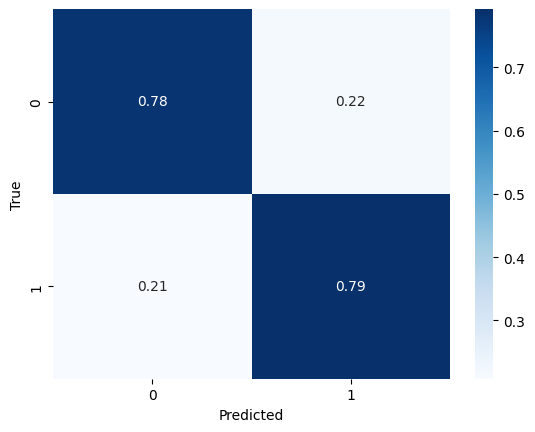

In [804]:
# display the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
df = test

cm = confusion_matrix(df['correct'], df['predicted'])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [233]:
len(df)

244

In [324]:
df = pd.concat([train, test])

In [325]:
df.to_csv('/home/binigo1/spine_project/extract_vert_feat/notebooks/vis.csv', index=False)

### Last

In [29]:
import pandas as pd
labeled_data = pd.read_csv("/home/binigo1/spine_project/extract_vert_feat/results/labeled_data.csv")
colon = pd.read_csv("/home/binigo1/spine_project/extract_vert_feat/results/all_feat_colon.csv")
liver = pd.read_csv("/home/binigo1/spine_project/extract_vert_feat/results/all_feat_Liver.csv")
covid = pd.read_csv("/home/binigo1/spine_project/extract_vert_feat/results/all_feat_COVID-19.csv")
neck = pd.read_csv("/home/binigo1/spine_project/extract_vert_feat/results/all_feat_HNSCC-3DCT-RT_neck.csv")
verse = pd.read_csv("/home/binigo1/spine_project/extract_vert_feat/results/all_feat_verse19.csv")
nmdid = pd.read_csv("/home/binigo1/spine_project/extract_vert_feat/results/NMDID_hr_all_features.csv")

all_data = pd.concat([colon, liver, covid, neck, verse, nmdid], ignore_index=True)
inference_data = all_data[~all_data['mesh_path'].isin(labeled_data['mesh_path'])]
# remove duplicates
inference_data.drop_duplicates(subset=['mesh_path'], inplace=True)
inference_data.to_csv('/home/binigo1/spine_project/extract_vert_feat/results/inference_data.csv', index=False)

/tmp/ipykernel_370012/896793760.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inference_data.drop_duplicates(subset=['mesh_path'], inplace=True)


In [52]:
predictions = pd.read_csv("/home/binigo1/spine_project/extract_vert_feat/results/inference_data_predictions.csv")
inference_data_NMDID = predictions[predictions['mesh_path'].str.contains('NMDID')]
inference_data_NMDID.to_csv('/home/binigo1/spine_project/extract_vert_feat/results/inference_data_NMDID.csv', index=False)

In [14]:
labeled_data = pd.read_csv('/home/binigo1/spine_project/extract_vert_feat/results/labeled_data_new.csv')
labeled_data['vertebrae'] = labeled_data['mesh_path'].apply(lambda x: x.split('/')[-1].split('_')[-1].split('.')[0])
vert_groups = {"lumbar": ['L1', 'L2', 'L3', 'L4', 'L5', "S1"], "thoracic": ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12'], "cervical": ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']}
labeled_data["vertebrae_group"] = labeled_data["vertebrae"].apply(lambda x: [k for k, v in vert_groups.items() if x in v][0])
# Extracting value counts for each vertebrae group
lumbar_counts = labeled_data[labeled_data['vertebrae_group'] == 'lumbar']['correct'].value_counts().sort_index()
thoracic_counts = labeled_data[labeled_data['vertebrae_group'] == 'thoracic']['correct'].value_counts().sort_index()
cervical_counts = labeled_data[labeled_data['vertebrae_group'] == 'cervical']['correct'].value_counts().sort_index()

# Creating tables
lumbar_table = pd.DataFrame({
    "Correctness": ["Correct (1.0)", "Incorrect (0.0)"],
    "Count": [lumbar_counts.get(1.0, 0), lumbar_counts.get(0.0, 0)]
})

thoracic_table = pd.DataFrame({
    "Correctness": ["Correct (1.0)", "Incorrect (0.0)"],
    "Count": [thoracic_counts.get(1.0, 0), thoracic_counts.get(0.0, 0)]
})

cervical_table = pd.DataFrame({
    "Correctness": ["Correct (1.0)", "Incorrect (0.0)"],
    "Count": [cervical_counts.get(1.0, 0), cervical_counts.get(0.0, 0)]
})

# Displaying tables
print("### Lumbar Vertebrae")
print(lumbar_table.to_string(index=False))

print("\n### Thoracic Vertebrae")
print(thoracic_table.to_string(index=False))

print("\n### Cervical Vertebrae")
print(cervical_table.to_string(index=False))


### Lumbar Vertebrae
    Correctness  Count
  Correct (1.0)    887
Incorrect (0.0)    377

### Thoracic Vertebrae
    Correctness  Count
  Correct (1.0)   1144
Incorrect (0.0)    395

### Cervical Vertebrae
    Correctness  Count
  Correct (1.0)    141
Incorrect (0.0)     52


In [36]:
print("Annotated vertebrae")
print(f"Verse: {len(labeled_data[labeled_data['mesh_path'].str.contains('verse')])}")
print(f"Liver: {len(labeled_data[labeled_data['mesh_path'].str.contains('liver')])}")
print(f"Colon: {len(labeled_data[labeled_data['mesh_path'].str.contains('colon')])}")

Annotated vertebrae
Verse: 1603
Liver: 1002
Colon: 391


In [37]:
len(labeled_data)

2996

In [58]:
inference_predictions = pd.read_csv('/home/binigo1/spine_project/extract_vert_feat/results/inference_data_predictions_NMDID.csv')
inference_predictions["vertebrae"] = inference_predictions["mesh_path"].apply(lambda x: x.split('/')[-1].split('_')[-1].split('.')[0])
inference_predictions["vertebrae_group"] = inference_predictions["vertebrae"].apply(lambda x: [k for k, v in vert_groups.items() if x in v][0])
print("LUMBAR")
print(f"TP: {len(inference_predictions[(inference_predictions['vertebrae_group'] == 'lumbar') & (inference_predictions['correct'] == False) & (inference_predictions['predicted'] == False)])}")
print(f"FP: {len(inference_predictions[(inference_predictions['vertebrae_group'] == 'lumbar') & (inference_predictions['correct'] == False) & (inference_predictions['predicted'] == True)])}")
print(f"TN: {len(inference_predictions[(inference_predictions['vertebrae_group'] == 'lumbar') & (inference_predictions['correct'] == True) & (inference_predictions['predicted'] == True)])}")
print(f"FN: {len(inference_predictions[(inference_predictions['vertebrae_group'] == 'lumbar') & (inference_predictions['correct'] == True) & (inference_predictions['predicted'] == False)])}")
print("THORACIC")
print(f"TP: {len(inference_predictions[(inference_predictions['vertebrae_group'] == 'thoracic') & (inference_predictions['correct'] == False) & (inference_predictions['predicted'] == False)])}")
print(f"FP: {len(inference_predictions[(inference_predictions['vertebrae_group'] == 'thoracic') & (inference_predictions['correct'] == False) & (inference_predictions['predicted'] == True)])}")
print(f"TN: {len(inference_predictions[(inference_predictions['vertebrae_group'] == 'thoracic') & (inference_predictions['correct'] == True) & (inference_predictions['predicted'] == True)])}")
print(f"FN: {len(inference_predictions[(inference_predictions['vertebrae_group'] == 'thoracic') & (inference_predictions['correct'] == True) & (inference_predictions['predicted'] == False)])}")

LUMBAR
TP: 87
FP: 17
TN: 92
FN: 30
THORACIC
TP: 84
FP: 13
TN: 121
FN: 58


/tmp/ipykernel_370012/2816291826.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
INFO:__main__:Saved confusion matrix for thorax to confusion_matrix_thorax.png
/tmp/ipykernel_370012/2816291826.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
INFO:__main__:Saved confusion matrix for lumbar to confusion_matrix_lumbar.png


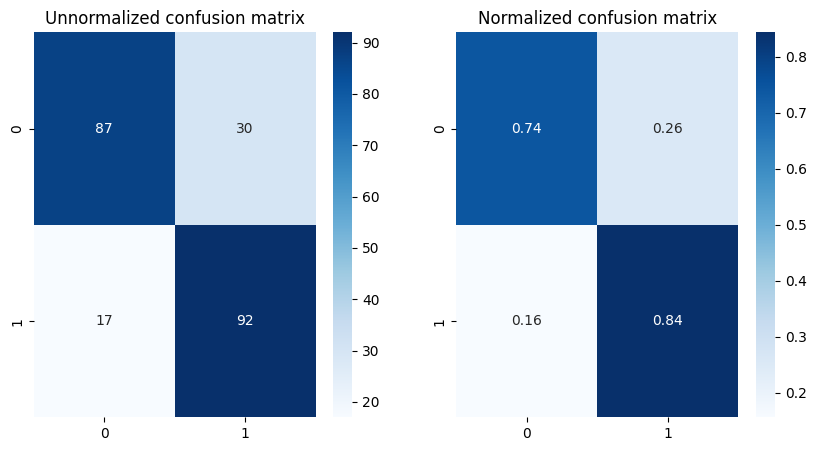

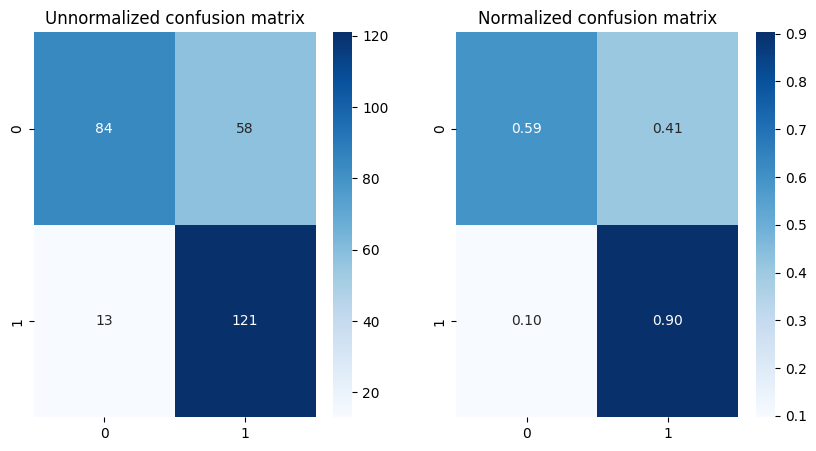

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

# Create confusion matrices
thorax_cm = np.array([[87, 30],  # TP, FN
                      [17, 92]]) # FP, TN
lumbar_cm = np.array([[84, 58],  # TP, FN
                      [13, 121]]) # FP, TN

# Function to generate and save confusion matrices
def save_confusion_matrix(cm, group_name):
    # Normalize the confusion matrix
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_norm = np.nan_to_num(cm_norm)  # Replace NaNs with 0 if any division by zero occurs

    # Create output folder
    test_cm_folder = Path('test_CM')
    test_cm_folder.mkdir(exist_ok=True)

    # Plotting the confusion matrices
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.heatmap(cm, annot=True, ax=ax[0], fmt='g', cmap='Blues')
    ax[0].set_title('Unnormalized confusion matrix')
    sns.heatmap(cm_norm, annot=True, ax=ax[1], fmt='.2f', cmap='Blues')
    ax[1].set_title('Normalized confusion matrix')
    # plt.tight_layout()
    # plt.savefig(f'{test_cm_folder}/confusion_matrix_{group_name}.png')
    # plt.close()
    fig.show()
    log.info(f"Saved confusion matrix for {group_name} to confusion_matrix_{group_name}.png")

# Generate and save for both groups
save_confusion_matrix(thorax_cm, "thorax")
save_confusion_matrix(lumbar_cm, "lumbar")
